In [ ]:
import numpy as np #it is a python library used for working with array
import pandas as pd #used for creating the pandas framework (structured & tabular table )
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading the data from csv file to a pandas dataframe
df = pd.read_csv('/ParkinsonsDataset.csv')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Data Preprocessing and Analysis**

In [ ]:
df.isnull().sum() #checking how mamy null values present

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df.drop(['name'], axis=1, inplace=True)

In [ ]:
X=df.drop(labels=['status'], axis=1)

In [ ]:
Y=df['status']

In [ ]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

**Data Visualisation**

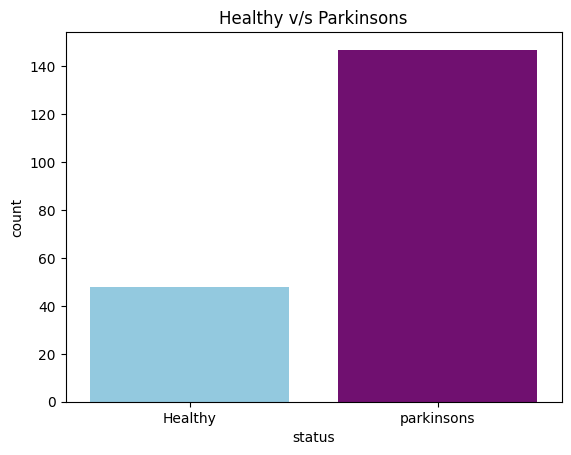

In [ ]:
# plt.figure(figsize=(10,6))
# df.status.hist()
# plt.xlabel('status')
# plt.ylabel('frequencies')
# plt.plot()

ax = sns.countplot(x="status", data=df, palette=["skyblue", "purple"])
ax.set_xticklabels(["Healthy", "parkinsons"])
ax.set_title("Healthy v/s Parkinsons");

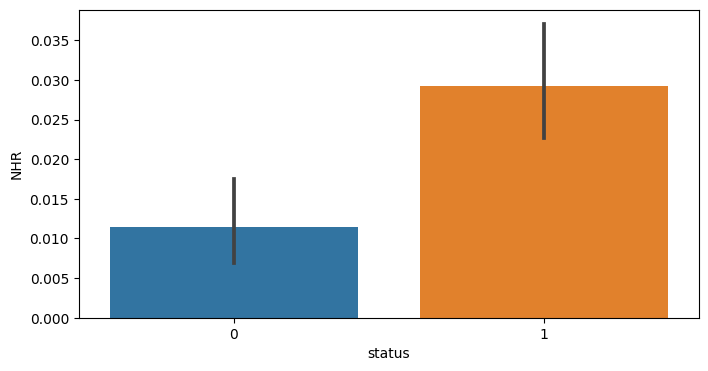

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='status',y='NHR',data=df);

###People suffering with parkinson's disease are having high values of NHR in comparision to healthy people.


<Axes: xlabel='status', ylabel='HNR'>

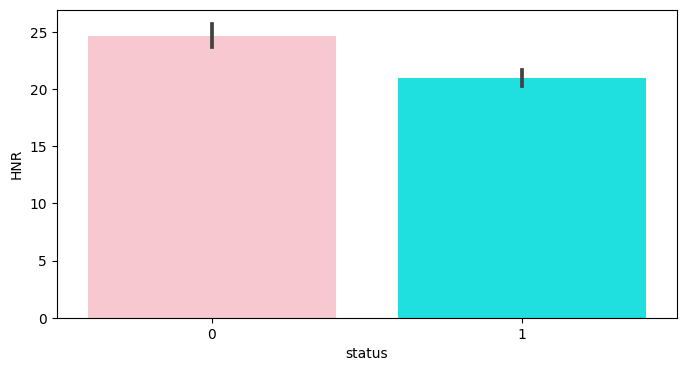

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='status',y='HNR',data=df, palette=["pink", "cyan"])

###People suffering with parkinson's disease are having low values of HNR in comparision to healthy people.

<Axes: xlabel='status', ylabel='MDVP:Fo(Hz)'>

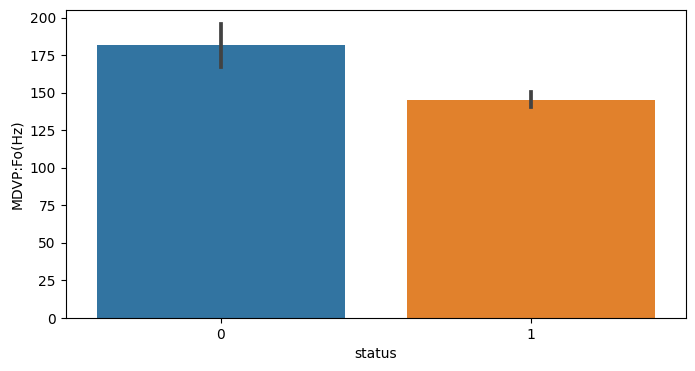

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='status',y='MDVP:Fo(Hz)',data=df)

### Split the data

In [ ]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=40)

In [ ]:
X_train.shape

(156, 22)

In [ ]:
X_test.shape

(39, 22)

###Scale transform


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.68061296  0.19876509  1.05286796 ...  1.64125301  2.10033836
   1.48228605]
 [ 0.55364638  0.04253347  0.58132502 ...  1.39796712  0.77021891
  -0.67917906]
 [-0.1671969  -0.46288083  0.44176523 ...  0.24286134  1.29027827
  -0.13601035]
 ...
 [ 1.94308925  0.50166779 -0.32281611 ... -0.59238004 -0.37181444
  -0.96096842]
 [-1.14523259 -0.92124291 -0.27220651 ... -0.45296821 -0.8364609
  -0.46310141]
 [-0.29694342 -0.39298773 -1.17469784 ... -0.75600724 -0.25536941
  -0.27036886]]


### Building machine learning models

1. logistic regression
2. decision tree
3. random forest
4. naive bayes classifier
5. knn
6. svm

**1. logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression().fit(X_train,Y_train)

In [ ]:
train_pred=log_reg.predict(X_train)
train_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1])

In [ ]:
test_pred=log_reg.predict(X_test)
test_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
print("training accuracy using svm:",accuracy_score(Y_train,train_pred))
print("test accuracy using naive svm:",accuracy_score(Y_test,test_pred))

training accuracy using svm: 0.8782051282051282
test accuracy using naive svm: 0.8461538461538461


In [ ]:
confusion_matrix(Y_train,train_pred)

# plt.imshow(cm, cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.xticks([0, 1], ["Negative", "Positive"])
# plt.yticks([0, 1], ["False", "True"])

# for i in range(2):
#     for j in range(2):
#         plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

array([[ 27,  13],
       [  6, 110]])

In [ ]:
confusion_matrix(Y_test,test_pred)

array([[ 5,  3],
       [ 3, 28]])

**2. Desision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier().fit(X_train,Y_train)

In [ ]:
train_pred_dt=dt.predict(X_train)

In [ ]:
train_pred_dt

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1])

In [ ]:
test_pred_dt=dt.predict(X_test)

In [ ]:
test_pred_dt

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print("training accuracy using decision tree:",accuracy_score(Y_train,train_pred_dt))
print("test accuracy using decision tree:",accuracy_score(Y_test,test_pred_dt))

training accuracy using decision tree: 1.0
test accuracy using decision tree: 0.9230769230769231


In [ ]:
confusion_matrix(Y_train,train_pred_dt)

array([[ 40,   0],
       [  0, 116]])

In [ ]:
confusion_matrix(Y_test,test_pred_dt)

array([[ 7,  1],
       [ 2, 29]])

**3. Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier().fit(X_train,Y_train)

In [ ]:
train_pred_rf=rf.predict(X_train)
train_pred_rf

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1])

In [ ]:
test_pred_rf=rf.predict(X_test)
test_pred_rf

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print("training accuracy using random forest:",accuracy_score(Y_train,train_pred_rf))
print("test accuracy using random forest:",accuracy_score(Y_test,test_pred_rf))

training accuracy using random forest: 1.0
test accuracy using random forest: 0.8461538461538461


In [ ]:
confusion_matrix(Y_train,train_pred_rf)

array([[ 40,   0],
       [  0, 116]])

In [ ]:
confusion_matrix(Y_test,test_pred_rf)

array([[ 5,  3],
       [ 3, 28]])

**4. naive bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb=GaussianNB().fit(X_train,Y_train)

In [ ]:
train_pred_gb=gb.predict(X_train)
train_pred_gb

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
test_pred_gb=gb.predict(X_test)
test_pred_gb

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print("training accuracy using naive bayes:",accuracy_score(Y_train,train_pred_gb))
print("test accuracy using naive bayes:",accuracy_score(Y_test,test_pred_gb))

training accuracy using naive bayes: 0.7051282051282052
test accuracy using naive bayes: 0.6923076923076923


In [ ]:
confusion_matrix(Y_train,train_pred_gb)

array([[37,  3],
       [43, 73]])

In [ ]:
confusion_matrix(Y_test,test_pred_gb)

array([[ 8,  0],
       [12, 19]])

**5. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
km=KNeighborsClassifier().fit(X_train,Y_train)

In [ ]:
train_pred_km=km.predict(X_train)
train_pred_km

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1])

In [ ]:
test_pred_km=km.predict(X_test)
test_pred_km

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
print("training accuracy using knn:",accuracy_score(Y_train,train_pred_km))
print("test accuracy using naive knn:",accuracy_score(Y_test,test_pred_km))

training accuracy using knn: 0.9487179487179487
test accuracy using naive knn: 0.9230769230769231


In [ ]:
confusion_matrix(Y_train,train_pred_km)

array([[ 35,   5],
       [  3, 113]])

In [ ]:
confusion_matrix(Y_test,test_pred_km)

array([[ 6,  2],
       [ 1, 30]])

**6. svm**

In [ ]:
from sklearn import svm

In [ ]:
sm=svm.SVC(kernel='linear')

In [ ]:
sm.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
train_pred_sm=sm.predict(X_train)
train_pred_sm

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

In [ ]:
test_pred_sm=sm.predict(X_test)
test_pred_sm

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print("training accuracy using svm:",accuracy_score(Y_train,train_pred_sm))
print("test accuracy using naive svm:",accuracy_score(Y_test,test_pred_sm))

training accuracy using svm: 0.9166666666666666
test accuracy using naive svm: 0.9230769230769231


In [ ]:
confusion_matrix(Y_train,train_pred_sm)

array([[ 28,  12],
       [  1, 115]])

In [ ]:
confusion_matrix(Y_test,test_pred_sm)

array([[ 5,  3],
       [ 0, 31]])

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the data

std_data = scaler.transform(input_data_reshaped)

prediction = sm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("person does not have parkinsons Disease")
else:
   print("the person has parkinsons ")

[0]
person does not have parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

In [ ]:
joblib.dump(sm, 'parkinsonModelNew.pkl')

['parkinsonModelNew.pkl']

In [ ]:
loaded_model = joblib.load(open('parkinsonModelNew.pkl', 'rb'))

In [ ]:
input_data = (142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,0.126,0.00772,0.00888,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have parkinsons disease')
else:
  print('The person has parkinsons disease')

[0]
The person does not have parkinsons disease
